In [4]:
import cv2
import os

data_path = r'D:\softInstall\python37\Lib\site-packages\cv2\data'

### 显示摄像头实时图像

In [4]:
cap = cv2.VideoCapture(1)

while (1): 
    ret, img = cap.read()
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()  # 释放摄像头
cv2.destroyAllWindows()  # 释放窗口资源

### 实时检测人脸

In [88]:
import cv2
import os

data_path = r'D:\softInstall\python37\Lib\site-packages\cv2\data'


def crop_pic(img, x, y, w, h):
    cv2.imshow('face', img[x:x + w, y:y + h, :])

In [94]:
cap = cv2.VideoCapture(0) 
face_cascade = cv2.CascadeClassifier(os.path.join(data_path, 'haarcascade_frontalface_default.xml')) # 加载人脸特征库

while(True):
    ret, frame = cap.read() # 读取一帧的图像
    if not ret:
        print('failed to read camera data.')
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 转灰

    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.15, minNeighbors = 5, minSize = (5, 5)) # 检测人脸
    for(x, y, w, h) in faces:
        crop_pic(frame, x, y, w, h)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2) # 用矩形圈出人脸
        
    cv2.imshow('Face Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release() # 释放摄像头
cv2.destroyAllWindows()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


### 背景消除

In [2]:
import cv2

#create Background Subtractor objects
backSub = cv2.createBackgroundSubtractorMOG2()
# backSub = cv2.createBackgroundSubtractorKNN()

# capture = cv.VideoCapture(cv.saqmples.findFileOrKeep(args.input))
capture = cv2.VideoCapture(0) 

if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
## [capture]

while True:
    ret, frame = capture.read()
    if frame is None:
        break

    ## [apply]
    #update the background model
    fgMask = backSub.apply(frame)
    ## [apply]

    ## [display_frame_number]
    #get the frame number and write it on the current frame
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    ## [display_frame_number]

    ## [show]
    #show the current frame and the fg masks
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    ## [show]

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

    
capture.release() # 释放摄像头
cv2.destroyAllWindows()

KeyboardInterrupt: 

### 目标检测

In [ ]:
import cv2
import argparse

def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)

    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)

        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)

    cv2.imshow('Capture - Face detection', frame)

parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
parser.add_argument('--face_cascade', help='Path to face cascade.', default='data/haarcascades/haarcascade_frontalface_alt.xml')
parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
parser.add_argument('--camera', help='Camera devide number.', type=int, default=0)
# args = parser.parse_args()

# face_cascade_name = args.face_cascade
# eyes_cascade_name = args.eyes_cascade
face_cascade_name = os.path.join(data_path, 'haarcascade_frontalface_alt.xml')
eyes_cascade_name = os.path.join(data_path, 'haarcascade_eye_tree_eyeglasses.xml')

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

#-- 1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)

camera_device = 1
#-- 2. Read the video stream
cap = cv2.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break

    detectAndDisplay(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

### [匹配图像位置](https://blog.csdn.net/ns2250225/article/details/60334176/)

In [57]:
import cv2
import aircv as ac

In [58]:
cd C:\Users\Administrator\Desktop

C:\Users\Administrator\Desktop


In [59]:
# print circle_center_pos
def draw_circle(img, pos, circle_radius, color, line_width):
    cv2.circle(img, pos, circle_radius, color, line_width)
    cv2.imshow('objDetect', imsrc) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()

imsrc = ac.imread('bg.jpg')
imobj = ac.imread('obj.png')
imsrc.shape, imobj.shape

((768, 1024, 3), (90, 98, 3))

In [60]:
# find the match position
pos = ac.find_template(imsrc, imobj)
pos

{'result': (793.0, 450.0),
 'rectangle': ((744, 405), (744, 495), (842, 405), (842, 495)),
 'confidence': 0.5435298681259155}

In [61]:
circle_center_pos = tuple(map(int, pos['result']))

circle_radius = 50
color = (0, 255, 0)
line_width = 10

# draw circle
draw_circle(imsrc, circle_center_pos, circle_radius, color, line_width)

In [83]:
img = cv2.imread('bg.jpg')
img.shape

(768, 1024, 3)

In [81]:
pos = [(744, 405), (744, 495), (842, 405), (842, 495)]
obj = img[405:495, 744:842 ,:]

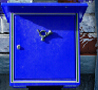

In [82]:
Image.fromarray(obj)

In [65]:
cv2.imwrite

numpy.ndarray